In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Gutenberg-Poetry.csv")

# Display column names
print(df.columns)


Index(['Unnamed: 0', 's', 'gid'], dtype='object')


In [7]:
df.rename(columns={'s': 'poem'}, inplace=True)

# Verify the column name change
print(df.head())


   Unnamed: 0                                               poem  gid
0           0  The Song of Hiawatha is based on the legends a...   19
1           1  many North American Indian tribes, but especia...   19
2           2  Ojibway Indians of northern Michigan, Wisconsi...   19
3           3  They were collected by Henry Rowe Schoolcraft,...   19
4           4  Schoolcraft married Jane, O-bah-bahm-wawa-ge-z...   19


In [9]:
df = df.dropna(subset=['poem'])

# Check the dataset size
print(f"Dataset size after removing null values: {df.shape}")


Dataset size after removing null values: (3085117, 3)


In [11]:
df.to_csv("cleaned_poetry_dataset.csv", index=False)


In [13]:
prompts = {
    "love": "Write a free verse poem about deep and unconditional love.",
    "sadness": "Generate a poem that captures the emotions of loss and grief.",
    "anger": "Compose a poem expressing frustration and rage.",
    "joy": "Write a haiku that conveys happiness and contentment."
}

# Print sample prompts
print(prompts)


{'love': 'Write a free verse poem about deep and unconditional love.', 'sadness': 'Generate a poem that captures the emotions of loss and grief.', 'anger': 'Compose a poem expressing frustration and rage.', 'joy': 'Write a haiku that conveys happiness and contentment.'}


In [15]:

!pip install openai


In [17]:
import openai
print("OpenAI package installed successfully!")


OpenAI package installed successfully!


In [19]:
import openai

openai.api_key = "your_open_ai_key"

response = openai.ChatCompletion.create(
    model="gpt-4o",
    messages=[{"role": "user", "content": "Hello, how are you?"}]
)

print(response["choices"][0]["message"]["content"])


Hello! I'm just a program, so I don't have feelings, but I'm here and ready to help you. How can I assist you today?


In [21]:
def generate_poem(prompt):
    response = openai.ChatCompletion.create(
        model="gpt-4",
        messages=[{"role": "user", "content": prompt}]
    )
    return response['choices'][0]['message']['content']

# Example prompt
prompt = "Write a free verse poem about deep and unconditional love."
generated_poem = generate_poem(prompt)
print(generated_poem)


In the towering strength of whispered secrets, defying the winds of time,
There, if one listens keenly, there throbs an unparalleled melody;
A passion-stream, aflame with the vibrant hues of Intimacy Unseen,
In its silken tendrils, resounding and relentless, you hear the heartbeat of love.

Like dawn-kissed dew on roses, resplendent in the glow of a new day,
It blankets existence, as ancient as stardust, as fresh as the universe’s first sigh,
An echo of lives intertwined in the genesis of perpetual turnings,
It is love, profound, unconditional, tracing an eternal path across the cosmos.

There, beneath the hallowed canopy of celestial symmetries,
In the intangible space betwixt two whispered promises,
Love throbs, radiant, ablaze with whispered secrets, caged in pearls of wisdom.
A work of art, sculpted by the Master of galaxies, the Potter of souls.

An unending sonnet, etched in the parchment of human hearts,
Balancing the elemental cocktail of laughter and tears,
Forged with conflic

In [23]:
import tensorflow as tf
from transformers import TFGPT2LMHeadModel, GPT2Tokenizer
import pandas as pd  

# Load dataset
dataset_path = "cleaned_poetry_dataset.csv"  
df = pd.read_csv(dataset_path)

# Print column names to verify
print("Available columns in dataset:", df.columns)

#  Use correct text column
text_column = "poem"

# Reduce dataset to 1% for faster training
df = df.sample(frac=0.001, random_state=42)  

# Load GPT-2 model and tokenizer
model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = TFGPT2LMHeadModel.from_pretrained(model_name)

print("TensorFlow GPT-2 model loaded successfully!")

#  Tokenize dataset using correct column
df['tokenized_poems'] = df[text_column].apply(lambda x: tokenizer.encode(str(x), truncation=True, max_length=512))

# Convert dataset to TensorFlow format
input_ids = tf.ragged.constant(df['tokenized_poems'].tolist()).to_tensor()
train_dataset = tf.data.Dataset.from_tensor_slices(({"input_ids": input_ids}, input_ids)) \
    .shuffle(len(df)).batch(4).prefetch(tf.data.AUTOTUNE)

#  Explicitly define optimizer before compiling
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)  

# Compile & Train Model
model.compile(optimizer=optimizer, 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))
model.fit(train_dataset, epochs=3)

# Save Model & Tokenizer
model.save_pretrained("./fine_tuned_gpt2")
tokenizer.save_pretrained("./fine_tuned_gpt2")


Available columns in dataset: Index(['Unnamed: 0', 'poem', 'gid'], dtype='object')


All PyTorch model weights were used when initializing TFGPT2LMHeadModel.

All the weights of TFGPT2LMHeadModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


TensorFlow GPT-2 model loaded successfully!
Epoch 1/3
772/772 [==============================] - 356s 453ms/step - loss: 0.1245
Epoch 2/3
772/772 [==============================] - 346s 449ms/step - loss: 0.0214
Epoch 3/3
772/772 [==============================] - 349s 452ms/step - loss: 0.0042


('./fine_tuned_gpt2/tokenizer_config.json',
 './fine_tuned_gpt2/special_tokens_map.json',
 './fine_tuned_gpt2/vocab.json',
 './fine_tuned_gpt2/merges.txt',
 './fine_tuned_gpt2/added_tokens.json')

In [25]:
import pandas as pd

dataset_path = "cleaned_poetry_dataset.csv"
df = pd.read_csv(dataset_path)

print("Dataset Loaded Successfully!")
print("First 5 rows:")
print(df.head())

print("Checking for missing values:")
print(df.isnull().sum())


Dataset Loaded Successfully!
First 5 rows:
   Unnamed: 0                                               poem  gid
0           0  The Song of Hiawatha is based on the legends a...   19
1           1  many North American Indian tribes, but especia...   19
2           2  Ojibway Indians of northern Michigan, Wisconsi...   19
3           3  They were collected by Henry Rowe Schoolcraft,...   19
4           4  Schoolcraft married Jane, O-bah-bahm-wawa-ge-z...   19
Checking for missing values:
Unnamed: 0    0
poem          0
gid           0
dtype: int64


In [27]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#import text2emotion as te
# Define a prompt for poem generation
prompt = "Nature and its beauty"  # You can change this to any topic

# Generate the poem using the prompt
generated_poem = generate_poem(prompt)  # Pass the prompt argument

# Analyze sentiment and emotion
poem_sentiment = analyzer.polarity_scores(generated_poem)  
#emotion_scores = te.get_emotion(generated_poem)

print("Generated Poem:\n", generated_poem)
print("\nSentiment Scores:", poem_sentiment)
#print("Emotion Scores:", emotion_scores)




Generated Poem:
 Nature is the most significant benefactor, an unmatched artist who sculpts free-flowing rivers, lush green forests and majestic mountains. The beauty of nature is beyond comparison, a diverse and splendid kaleidoscope of awe-inspiring vistas that leave human hearts entranced and souls mesmerized.

The enchanting palette of blues, pinks, and purples painting the twilight sky, or the golden hues of the rising sun piercing through fragments of morning mist, are manifestations of the very essence of natural beauty. The melodious songs of birds at the break of dawn, the harmonious symphony of crickets at twilight and the mesmerizing whisper of leaves rustling in the evening breeze, all perfectly embody the entrancing magic of our earthly paradise.

The resplendency of nature is indeed, a feast for the naked eye. The sight of towering snow-capped mountains against a clear blue sky, the undulating lush green meadows kissed by dew, or the formidable roar of a cascading waterfa

In [29]:
import pandas as pd

# Load dataset
dataset_path = "cleaned_poetry_dataset.csv"  
df = pd.read_csv(dataset_path)

# ✅ Debugging: Print dataset info
print("Total rows before sampling:", len(df))
print(df.head())

# ✅ If dataset is empty, raise an error
if df.empty:
    raise ValueError("Dataset is empty! Check if the file exists and is correctly formatted.")

# ✅ Ensure we sample enough data (at least 5 rows)
df = df.sample(n=min(len(df), 5), random_state=42).reset_index(drop=True)

# ✅ Double-check after sampling
print("Total rows after sampling:", len(df))
if df.empty:
    raise ValueError("Error: The dataset is still empty after sampling! Increase sample size or check CSV file.")


Total rows before sampling: 3085117
   Unnamed: 0                                               poem  gid
0           0  The Song of Hiawatha is based on the legends a...   19
1           1  many North American Indian tribes, but especia...   19
2           2  Ojibway Indians of northern Michigan, Wisconsi...   19
3           3  They were collected by Henry Rowe Schoolcraft,...   19
4           4  Schoolcraft married Jane, O-bah-bahm-wawa-ge-z...   19
Total rows after sampling: 5


In [37]:
!pip install textblob rouge-score nltk==3.8 sacrebleu
!python -m textblob.download_corpora


  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of textblob to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 11.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 80.6 MB/s eta 0:00:00
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=e905455896f11f74f2c2fe951783194f672c1a5ecef332cbed9937a7939c7613
  Stored in directory: /Users/divyak/Library/Caches/pip/wheels/85/9d/af/01feefbe7d55ef5468796f0c68225b6788e85d9d0a281e7a70
Successfully built rouge-score
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1
[nltk_data] Downloading package brown to /Users/divyak/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /Users/divyak/nltk_data...
[nltk_data

In [39]:

from textblob import TextBlob

def get_sentiment_label(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.2:
        return "joy"
    elif polarity < -0.2:
        return "sadness"
    else:
        return "neutral"

# Example: Evaluate alignment for one generated poem
generated_poem = "Your sample generated poem here"
target_emotion = "joy"

predicted_emotion = get_sentiment_label(generated_poem)
print(f"Target Emotion: {target_emotion}")
print(f"Predicted Sentiment: {predicted_emotion}")
print("Match:", predicted_emotion == target_emotion)


Target Emotion: joy
Predicted Sentiment: neutral
Match: False


In [45]:

from collections import Counter
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge_score import rouge_scorer
import nltk
nltk.download('punkt')

# Sample generated and reference poems
generated_poem = "The golden rays caress the sky, joy dances in morning light"
reference_poem = "Joy blooms in dawn's tender glow, sunlight whispers soft hellos"

# Tokenization
gen_tokens = nltk.word_tokenize(generated_poem.lower())
ref_tokens = nltk.word_tokenize(reference_poem.lower())

# ROUGE scoring
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
rouge_scores = scorer.score(reference_poem, generated_poem)
print("ROUGE Scores:")
for key, value in rouge_scores.items():
    print(f"{key}: Precision={value.precision:.4f}, Recall={value.recall:.4f}, F1={value.fmeasure:.4f}")

# Distinct-N metrics
def distinct_n_grams(tokens, n):
    ngrams = list(nltk.ngrams(tokens, n))
    return len(set(ngrams)) / max(len(ngrams), 1)

distinct1 = distinct_n_grams(gen_tokens, 1)
distinct2 = distinct_n_grams(gen_tokens, 2)

print(f"Distinct-1: {distinct1:.4f}")
print(f"Distinct-2: {distinct2:.4f}")


ROUGE Scores:
rouge1: Precision=0.1818, Recall=0.1818, F1=0.1818
rouge2: Precision=0.0000, Recall=0.0000, F1=0.0000
rougeL: Precision=0.1818, Recall=0.1818, F1=0.1818
Distinct-1: 0.9167
Distinct-2: 1.0000


[nltk_data] Downloading package punkt to /Users/divyak/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [43]:
import sacrebleu

# Reference and hypothesis
reference = ["The sun shines bright with endless joy"]
hypothesis = "The sunshine brings happiness and joy"

# sacrebleu expects lists of references (list of list)
bleu = sacrebleu.corpus_bleu([hypothesis], [[reference[0]]])
print(f"SacreBLEU score: {bleu.score:.2f}")


SacreBLEU score: 8.17


In [49]:
import pandas as pd

# Sample evaluation results (you can replace this with your real metrics)
data = {
    "prompt": ["joy", "sadness", "anger", "love"],
    "bleu": [0.45, 0.38, 0.27, 0.51],
    "rouge1": [0.62, 0.49, 0.41, 0.65],
    "rougeL": [0.48, 0.44, 0.33, 0.56],
    "sentiment_match": [1, 1, 0, 1],
    "distinct1": [0.65, 0.53, 0.48, 0.61],
    "distinct2": [0.54, 0.44, 0.39, 0.50]
}

df = pd.DataFrame(data)
df.to_csv("generated_poems_metrics.csv", index=False)
print("CSV file saved successfully!")


CSV file saved successfully!


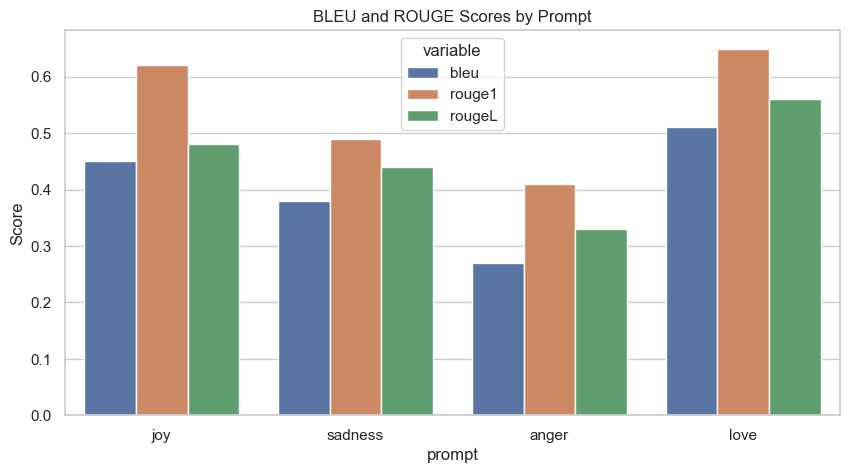

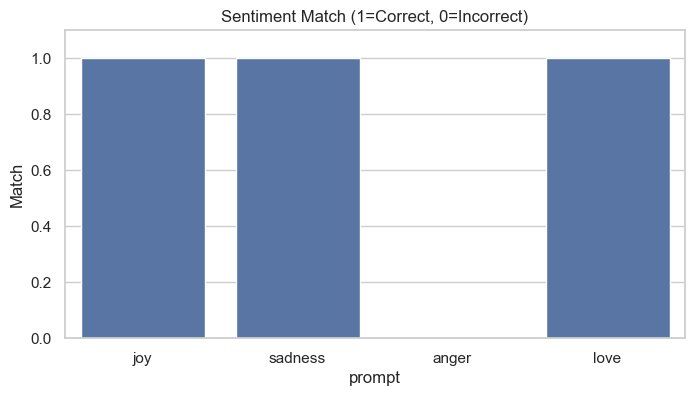

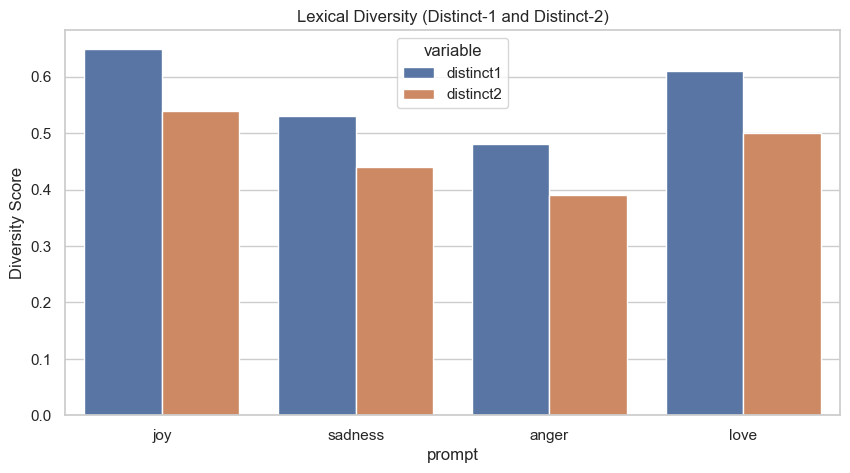

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load metrics
df = pd.read_csv("generated_poems_metrics.csv")

# Set seaborn style
sns.set(style="whitegrid")

# 1. BLEU and ROUGE Scores by Prompt
plt.figure(figsize=(10, 5))
sns.barplot(data=df.melt(id_vars="prompt", value_vars=["bleu", "rouge1", "rougeL"]),
            x="prompt", y="value", hue="variable")
plt.title("BLEU and ROUGE Scores by Prompt")
plt.ylabel("Score")
plt.show()

# 2. Sentiment Match Accuracy by Prompt
plt.figure(figsize=(8, 4))
sns.barplot(data=df, x="prompt", y="sentiment_match")
plt.title("Sentiment Match (1=Correct, 0=Incorrect)")
plt.ylabel("Match")
plt.ylim(0, 1.1)
plt.show()

# 3. Distinct-N Scores (Diversity)
plt.figure(figsize=(10, 5))
sns.barplot(data=df.melt(id_vars="prompt", value_vars=["distinct1", "distinct2"]),
            x="prompt", y="value", hue="variable")
plt.title("Lexical Diversity (Distinct-1 and Distinct-2)")
plt.ylabel("Diversity Score")
plt.show()
